## Chargement des données de santé

In [1]:
import numpy as np 

donnees_sante = np.genfromtxt("donnees_risque_maladie.csv", delimiter=",")
nLig, nCol = donnees_sante.shape
print(f"On a {nLig} lignes et {nCol} colonnes")

On a 918 lignes et 12 colonnes


# Exercices

Voir le sujet donné sur papier

# Question 1
- Nous sommes face à un problème de classification binaire

# Question 2


In [2]:
# On sépare en 2 groupes : entrainement ( training + validation) et test

donnees_sante_train = donnees_sante[:550,:]
donnees_sante_validation = donnees_sante[550:734:,:]
donnees_sante_test = donnees_sante[734:,:]

print(f"On a {donnees_sante_train.shape[0]} lignes et {donnees_sante_train.shape[1]} colonnes pour le training")
print(f"On a {donnees_sante_validation.shape[0]} lignes et {donnees_sante_validation.shape[1]} colonnes pour la validation du training")
print(f"On a {donnees_sante_test.shape[0]} lignes et {donnees_sante_test.shape[1]} colonnes pour le test")

print(f"soit bien un total de {donnees_sante_train.shape[0] + donnees_sante_validation.shape[0] + donnees_sante_test.shape[0]} lignes et {donnees_sante_train.shape[1]} colonnes")

On a 550 lignes et 12 colonnes pour le training
On a 184 lignes et 12 colonnes pour la validation du training
On a 184 lignes et 12 colonnes pour le test
soit bien un total de 918 lignes et 12 colonnes


# Question 3/4


In [3]:
train_data = donnees_sante_train[:,:-1]
train_labels = donnees_sante_train[:,-1]

validation_data = donnees_sante_validation[:,:-1]
validation_labels = donnees_sante_validation[:,-1]

test_data = donnees_sante_test[:,:-1]
test_labels = donnees_sante_test[:,-1]


## Normalisation des données

In [4]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

validation_data -= mean
validation_data /= std

test_data -= mean
test_data /= std

# Construction du réseau de neurones

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer='rmsprop', 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

In [6]:
model = build_model()

# Sans K-FOLD ( training)

In [7]:
history = model.fit(train_data, train_labels, 
                    epochs=200, 
                    batch_size=64, 
                    validation_data=(validation_data, validation_labels))

Epoch 1/200
9/9 [==============================] - 1s 27ms/step - loss: 0.6525 - accuracy: 0.6200 - val_loss: 0.6401 - val_accuracy: 0.6141
Epoch 2/200
9/9 [==============================] - 0s 7ms/step - loss: 0.6140 - accuracy: 0.6618 - val_loss: 0.6232 - val_accuracy: 0.6250
Epoch 3/200
9/9 [==============================] - 0s 8ms/step - loss: 0.5858 - accuracy: 0.6891 - val_loss: 0.6095 - val_accuracy: 0.6576
Epoch 4/200
9/9 [==============================] - 0s 6ms/step - loss: 0.5618 - accuracy: 0.7164 - val_loss: 0.5970 - val_accuracy: 0.6630
Epoch 5/200
9/9 [==============================] - 0s 7ms/step - loss: 0.5402 - accuracy: 0.7400 - val_loss: 0.5856 - val_accuracy: 0.6957
Epoch 6/200
9/9 [==============================] - 0s 5ms/step - loss: 0.5203 - accuracy: 0.7636 - val_loss: 0.5756 - val_accuracy: 0.7011
Epoch 7/200
9/9 [==============================] - 0s 4ms/step - loss: 0.5024 - accuracy: 0.7782 - val_loss: 0.5670 - val_accuracy: 0.7120
Epoch 8/200
9/9 [=========

9/9 [==============================] - 0s 5ms/step - loss: 0.2476 - accuracy: 0.9127 - val_loss: 0.5387 - val_accuracy: 0.7826
Epoch 60/200
9/9 [==============================] - 0s 4ms/step - loss: 0.2458 - accuracy: 0.9145 - val_loss: 0.5395 - val_accuracy: 0.7826
Epoch 61/200
9/9 [==============================] - 0s 4ms/step - loss: 0.2438 - accuracy: 0.9127 - val_loss: 0.5407 - val_accuracy: 0.7826
Epoch 62/200
9/9 [==============================] - 0s 6ms/step - loss: 0.2419 - accuracy: 0.9145 - val_loss: 0.5413 - val_accuracy: 0.7826
Epoch 63/200
9/9 [==============================] - 0s 5ms/step - loss: 0.2401 - accuracy: 0.9145 - val_loss: 0.5426 - val_accuracy: 0.7772
Epoch 64/200
9/9 [==============================] - 0s 4ms/step - loss: 0.2384 - accuracy: 0.9145 - val_loss: 0.5439 - val_accuracy: 0.7772
Epoch 65/200
9/9 [==============================] - 0s 5ms/step - loss: 0.2360 - accuracy: 0.9145 - val_loss: 0.5457 - val_accuracy: 0.7772
Epoch 66/200
9/9 [===============

9/9 [==============================] - 0s 5ms/step - loss: 0.1780 - accuracy: 0.9382 - val_loss: 0.6197 - val_accuracy: 0.7609
Epoch 118/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1770 - accuracy: 0.9436 - val_loss: 0.6227 - val_accuracy: 0.7609
Epoch 119/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1763 - accuracy: 0.9418 - val_loss: 0.6245 - val_accuracy: 0.7609
Epoch 120/200
9/9 [==============================] - 0s 6ms/step - loss: 0.1755 - accuracy: 0.9418 - val_loss: 0.6260 - val_accuracy: 0.7609
Epoch 121/200
9/9 [==============================] - 0s 6ms/step - loss: 0.1746 - accuracy: 0.9436 - val_loss: 0.6273 - val_accuracy: 0.7609
Epoch 122/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1741 - accuracy: 0.9418 - val_loss: 0.6293 - val_accuracy: 0.7609
Epoch 123/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1733 - accuracy: 0.9455 - val_loss: 0.6312 - val_accuracy: 0.7609
Epoch 124/200
9/9 [========

9/9 [==============================] - 0s 6ms/step - loss: 0.1466 - accuracy: 0.9491 - val_loss: 0.7286 - val_accuracy: 0.7609
Epoch 176/200
9/9 [==============================] - 0s 5ms/step - loss: 0.1463 - accuracy: 0.9491 - val_loss: 0.7307 - val_accuracy: 0.7609
Epoch 177/200
9/9 [==============================] - 0s 6ms/step - loss: 0.1460 - accuracy: 0.9491 - val_loss: 0.7312 - val_accuracy: 0.7609
Epoch 178/200
9/9 [==============================] - 0s 6ms/step - loss: 0.1453 - accuracy: 0.9491 - val_loss: 0.7320 - val_accuracy: 0.7609
Epoch 179/200
9/9 [==============================] - 0s 6ms/step - loss: 0.1451 - accuracy: 0.9527 - val_loss: 0.7329 - val_accuracy: 0.7609
Epoch 180/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1449 - accuracy: 0.9491 - val_loss: 0.7348 - val_accuracy: 0.7609
Epoch 181/200
9/9 [==============================] - 0s 5ms/step - loss: 0.1442 - accuracy: 0.9509 - val_loss: 0.7350 - val_accuracy: 0.7609
Epoch 182/200
9/9 [========

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 96        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 137 (548.00 Byte)
Trainable params: 137 (548.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
history_dict = history.history


history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Loss fn


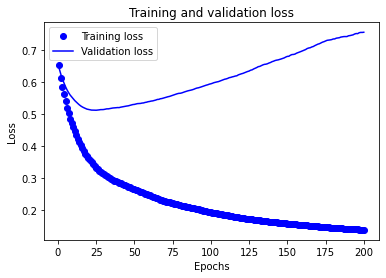

In [10]:
import matplotlib.pyplot as plt
import numpy as np

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Loss fn tronquée


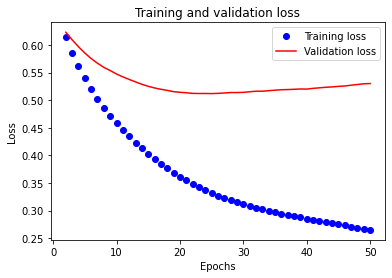

In [11]:
plt.plot(epochs[1:50], loss[1:50], 'bo', label="Training loss")
plt.plot(epochs[1:50], val_loss[1:50], 'r', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Loss fn accuracy

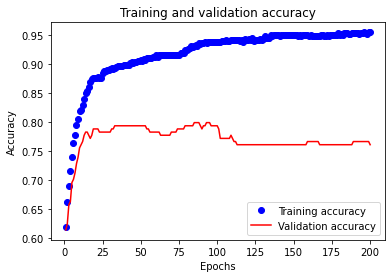

In [12]:

accu = history_dict['accuracy']
val_accu = history_dict['val_accuracy']

plt.plot(epochs, accu, 'bo', label="Training accuracy")
plt.plot(epochs, val_accu, 'r', label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Loss fn accuracy tronquée

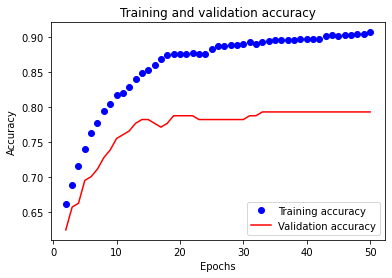

In [13]:
plt.plot(epochs[1:50], accu[1:50], 'bo', label="Training accuracy")
plt.plot(epochs[1:50], val_accu[1:50], 'r', label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Nouvel entrainement avec un meilleur nombre d'epochs

In [14]:
model = build_model()

history = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=16,
                    validation_data=(validation_data, validation_labels))

Epoch 1/20
35/35 [==============================] - 1s 6ms/step - loss: 0.6273 - accuracy: 0.6855 - val_loss: 0.6099 - val_accuracy: 0.7011
Epoch 2/20
35/35 [==============================] - 0s 2ms/step - loss: 0.5722 - accuracy: 0.7291 - val_loss: 0.5851 - val_accuracy: 0.7011
Epoch 3/20
35/35 [==============================] - 0s 2ms/step - loss: 0.5271 - accuracy: 0.7891 - val_loss: 0.5642 - val_accuracy: 0.7174
Epoch 4/20
35/35 [==============================] - 0s 3ms/step - loss: 0.4842 - accuracy: 0.8309 - val_loss: 0.5462 - val_accuracy: 0.7337
Epoch 5/20
35/35 [==============================] - 0s 2ms/step - loss: 0.4442 - accuracy: 0.8455 - val_loss: 0.5316 - val_accuracy: 0.7500
Epoch 6/20
35/35 [==============================] - 0s 3ms/step - loss: 0.4079 - accuracy: 0.8727 - val_loss: 0.5214 - val_accuracy: 0.7663
Epoch 7/20
35/35 [==============================] - 0s 2ms/step - loss: 0.3772 - accuracy: 0.8782 - val_loss: 0.5151 - val_accuracy: 0.7609
Epoch 8/20
35/35 [==

## Loss fn

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 96        
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 137 (548.00 Byte)
Trainable params: 137 (548.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


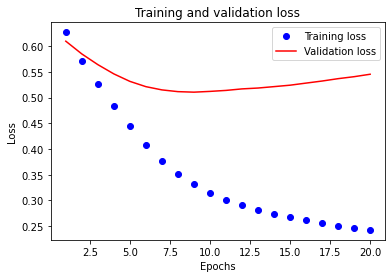

In [15]:
model.summary()

history_dict = history.history
history_dict.keys()

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'r', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



## On test notre modèle sur les données de test qu'il n'a jamais vu

In [16]:
model = build_model()

# regouper le training et le validation pour avoir plus de données
train_data = np.concatenate((train_data, validation_data))
train_labels = np.concatenate((train_labels, validation_labels))

history = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=16,
                    validation_data=(test_data, test_labels))



Epoch 1/20
46/46 [==============================] - 1s 5ms/step - loss: 0.8078 - accuracy: 0.5068 - val_loss: 0.8417 - val_accuracy: 0.3804
Epoch 2/20
46/46 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.5450 - val_loss: 0.7487 - val_accuracy: 0.4728
Epoch 3/20
46/46 [==============================] - 0s 2ms/step - loss: 0.6395 - accuracy: 0.6512 - val_loss: 0.7114 - val_accuracy: 0.5380
Epoch 4/20
46/46 [==============================] - 0s 2ms/step - loss: 0.6036 - accuracy: 0.7330 - val_loss: 0.6935 - val_accuracy: 0.5815
Epoch 5/20
46/46 [==============================] - 0s 2ms/step - loss: 0.5720 - accuracy: 0.7548 - val_loss: 0.6745 - val_accuracy: 0.6250
Epoch 6/20
46/46 [==============================] - 0s 2ms/step - loss: 0.5406 - accuracy: 0.7738 - val_loss: 0.6512 - val_accuracy: 0.6739
Epoch 7/20
46/46 [==============================] - 0s 2ms/step - loss: 0.5100 - accuracy: 0.7970 - val_loss: 0.6232 - val_accuracy: 0.7065
Epoch 8/20
46/46 [==

## On trace la courbe de loss fn & accuracy


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 96        
                                                                 
 dense_7 (Dense)             (None, 4)                 36        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 137 (548.00 Byte)
Trainable params: 137 (548.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


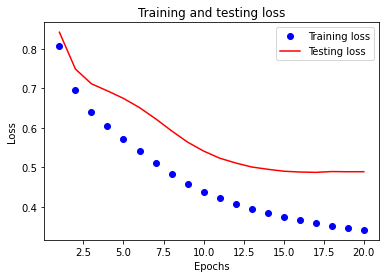

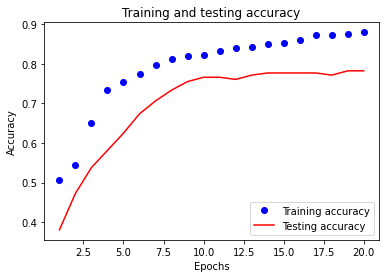

In [17]:
model.summary()

history_dict = history.history
history_dict.keys()

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'r', label="Testing loss")
plt.title("Training and testing loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

accu = history_dict['accuracy']
val_accu = history_dict['val_accuracy']

plt.plot(epochs, accu, 'bo', label="Training accuracy")
plt.plot(epochs, val_accu, 'r', label="Testing accuracy")
plt.title("Training and testing accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
    

In [18]:
# On arrive à atteindre une précision
print(f"on atteint une précision de {val_accu[-1]*100:1f} sur le test")

on atteint une précision de 78.260869 sur le test


# On fait une prédiction sur un nouveau patient

In [19]:
new_patient = np.array([[43, 1, 3, 147, 243, 0, 0, 177, 0, 0.7, 2]])

# On normalise les données
new_patient -= mean
new_patient /= std

In [20]:
prediction = model.predict(new_patient)
# prediction = prediction.numpy()

predicted_labels = np.argmax(prediction, axis=1)
matches = predicted_labels == test_labels


print(f"Le patient a {prediction[0][0]*100:.2f}% de chance de contracter la maladie")
print(f"Le modèle a une précision de {round(matches.mean(),3)} sur le test")

1/1 [==============================] - 0s 82ms/step
Le patient a 11.65% de chance de contracter la maladie
Le modèle a une précision de 0.533 sur le test


# Avec K-FOLD ( training)

In [21]:
def build_model():
    model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(4, activation="relu"),

    layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer='rmsprop', 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

In [22]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_loss_histories = []
all_val_loss_histories = []
all_accu_histories = []
all_val_accu_histories = []

for i in range(k):
    print(f"processing fold #{i}")
    val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_labels = train_labels[i*num_val_samples: (i+1)*num_val_samples]
    
    partial_train_data = np.concatenate((train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]))
    partial_train_labels = np.concatenate((train_labels[:i*num_val_samples], train_labels[(i+1)*num_val_samples:]))
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_labels, 
                        epochs=num_epochs, 
                        batch_size=16, 
                        validation_data=(val_data, val_labels))
    
    loss_history = history.history['loss']
    val_loss_history = history.history['val_loss']
    accu_history = history.history['accuracy']
    val_accu_history = history.history['val_accuracy']
    
    all_loss_histories.append(loss_history)
    all_val_loss_histories.append(val_loss_history)
    all_accu_histories.append(accu_history)
    all_val_accu_histories.append(val_accu_history)

average_loss = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_val_loss = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_accu_history = [np.mean([x[i] for x in all_accu_histories]) for i in range(num_epochs)]
average_val_accu_history = [np.mean([x[i] for x in all_val_accu_histories]) for i in range(num_epochs)]

processing fold #0
Epoch 1/100
35/35 [==============================] - 1s 6ms/step - loss: 0.7067 - accuracy: 0.5662 - val_loss: 0.5899 - val_accuracy: 0.7869
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.6770 - val_loss: 0.5574 - val_accuracy: 0.8197
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6013 - accuracy: 0.7405 - val_loss: 0.5277 - val_accuracy: 0.8251
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 0.5625 - accuracy: 0.7731 - val_loss: 0.4969 - val_accuracy: 0.8470
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 0.5251 - accuracy: 0.7877 - val_loss: 0.4711 - val_accuracy: 0.8415
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4930 - accuracy: 0.8113 - val_loss: 0.4462 - val_accuracy: 0.8415
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4658 - accuracy: 0.8167 - val_loss: 0.4259 - val_accuracy: 0

35/35 [==============================] - 0s 2ms/step - loss: 0.3031 - accuracy: 0.8838 - val_loss: 0.2549 - val_accuracy: 0.8907
Epoch 59/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3022 - accuracy: 0.8820 - val_loss: 0.2546 - val_accuracy: 0.8907
Epoch 60/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3013 - accuracy: 0.8838 - val_loss: 0.2517 - val_accuracy: 0.8907
Epoch 61/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3004 - accuracy: 0.8820 - val_loss: 0.2506 - val_accuracy: 0.8907
Epoch 62/100
35/35 [==============================] - 0s 2ms/step - loss: 0.2997 - accuracy: 0.8820 - val_loss: 0.2499 - val_accuracy: 0.8852
Epoch 63/100
35/35 [==============================] - 0s 2ms/step - loss: 0.2987 - accuracy: 0.8820 - val_loss: 0.2487 - val_accuracy: 0.8852
Epoch 64/100
35/35 [==============================] - 0s 2ms/step - loss: 0.2986 - accuracy: 0.8820 - val_loss: 0.2478 - val_accuracy: 0.8798
Epoch 65/100
35/35 

Epoch 16/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4756 - accuracy: 0.8203 - val_loss: 0.5152 - val_accuracy: 0.8251
Epoch 17/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4711 - accuracy: 0.8312 - val_loss: 0.5120 - val_accuracy: 0.8197
Epoch 18/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.8367 - val_loss: 0.5080 - val_accuracy: 0.8251
Epoch 19/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4632 - accuracy: 0.8348 - val_loss: 0.5050 - val_accuracy: 0.8197
Epoch 20/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4595 - accuracy: 0.8276 - val_loss: 0.5017 - val_accuracy: 0.8197
Epoch 21/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4557 - accuracy: 0.8312 - val_loss: 0.4984 - val_accuracy: 0.8142
Epoch 22/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4522 - accuracy: 0.8294 - val_loss: 0.4956 - val_accuracy: 0.8142
Epoch 

Epoch 74/100
35/35 [==============================] - 0s 3ms/step - loss: 0.3204 - accuracy: 0.8929 - val_loss: 0.3733 - val_accuracy: 0.8361
Epoch 75/100
35/35 [==============================] - 0s 3ms/step - loss: 0.3193 - accuracy: 0.8911 - val_loss: 0.3740 - val_accuracy: 0.8361
Epoch 76/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8929 - val_loss: 0.3723 - val_accuracy: 0.8415
Epoch 77/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3164 - accuracy: 0.8929 - val_loss: 0.3718 - val_accuracy: 0.8361
Epoch 78/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3155 - accuracy: 0.8929 - val_loss: 0.3714 - val_accuracy: 0.8361
Epoch 79/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3139 - accuracy: 0.8911 - val_loss: 0.3711 - val_accuracy: 0.8361
Epoch 80/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3124 - accuracy: 0.8929 - val_loss: 0.3682 - val_accuracy: 0.8415
Epoch 

35/35 [==============================] - 0s 2ms/step - loss: 0.3035 - accuracy: 0.8857 - val_loss: 0.3112 - val_accuracy: 0.8907
Epoch 32/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3010 - accuracy: 0.8857 - val_loss: 0.3097 - val_accuracy: 0.8907
Epoch 33/100
35/35 [==============================] - 0s 2ms/step - loss: 0.2987 - accuracy: 0.8893 - val_loss: 0.3089 - val_accuracy: 0.8907
Epoch 34/100
35/35 [==============================] - 0s 2ms/step - loss: 0.2962 - accuracy: 0.8911 - val_loss: 0.3086 - val_accuracy: 0.8962
Epoch 35/100
35/35 [==============================] - 0s 2ms/step - loss: 0.2942 - accuracy: 0.8893 - val_loss: 0.3075 - val_accuracy: 0.8962
Epoch 36/100
35/35 [==============================] - 0s 2ms/step - loss: 0.2921 - accuracy: 0.8929 - val_loss: 0.3067 - val_accuracy: 0.8907
Epoch 37/100
35/35 [==============================] - 0s 2ms/step - loss: 0.2906 - accuracy: 0.8911 - val_loss: 0.3064 - val_accuracy: 0.8907
Epoch 38/100
35/35 

Epoch 89/100
35/35 [==============================] - 0s 3ms/step - loss: 0.2387 - accuracy: 0.9056 - val_loss: 0.3412 - val_accuracy: 0.8634
Epoch 90/100
35/35 [==============================] - 0s 3ms/step - loss: 0.2388 - accuracy: 0.9056 - val_loss: 0.3412 - val_accuracy: 0.8634
Epoch 91/100
35/35 [==============================] - 0s 3ms/step - loss: 0.2382 - accuracy: 0.9056 - val_loss: 0.3421 - val_accuracy: 0.8634
Epoch 92/100
35/35 [==============================] - 0s 3ms/step - loss: 0.2376 - accuracy: 0.9056 - val_loss: 0.3421 - val_accuracy: 0.8634
Epoch 93/100
35/35 [==============================] - 0s 2ms/step - loss: 0.2369 - accuracy: 0.9074 - val_loss: 0.3430 - val_accuracy: 0.8634
Epoch 94/100
35/35 [==============================] - 0s 3ms/step - loss: 0.2366 - accuracy: 0.9056 - val_loss: 0.3438 - val_accuracy: 0.8634
Epoch 95/100
35/35 [==============================] - 0s 3ms/step - loss: 0.2365 - accuracy: 0.9038 - val_loss: 0.3450 - val_accuracy: 0.8634
Epoch 

35/35 [==============================] - 0s 2ms/step - loss: 0.1977 - accuracy: 0.9310 - val_loss: 0.6229 - val_accuracy: 0.7923
Epoch 47/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1974 - accuracy: 0.9310 - val_loss: 0.6258 - val_accuracy: 0.7923
Epoch 48/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1964 - accuracy: 0.9328 - val_loss: 0.6307 - val_accuracy: 0.7869
Epoch 49/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1957 - accuracy: 0.9310 - val_loss: 0.6323 - val_accuracy: 0.7923
Epoch 50/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1953 - accuracy: 0.9310 - val_loss: 0.6323 - val_accuracy: 0.7923
Epoch 51/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1944 - accuracy: 0.9310 - val_loss: 0.6333 - val_accuracy: 0.7869
Epoch 52/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1935 - accuracy: 0.9310 - val_loss: 0.6340 - val_accuracy: 0.7923
Epoch 53/100
35/35 

In [23]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 8)                 96        
                                                                 
 dense_19 (Dense)            (None, 4)                 36        
                                                                 
 dense_20 (Dense)            (None, 1)                 5         
                                                                 
Total params: 137 (548.00 Byte)
Trainable params: 137 (548.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


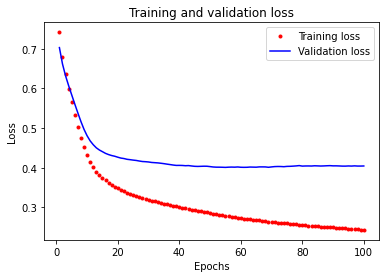

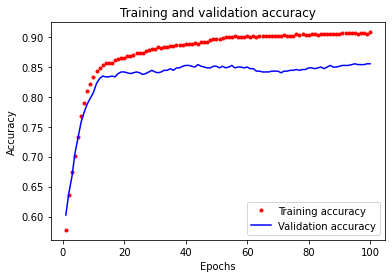

In [24]:
epochs = range(1, len(average_loss) + 1)
plt.plot(epochs, average_loss, "r.", label="Training loss")
plt.plot(epochs, average_val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(epochs, average_accu_history, "r.", label="Training accuracy")
plt.plot(epochs, average_val_accu_history, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## plot tronqué

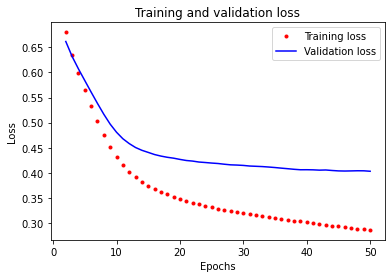

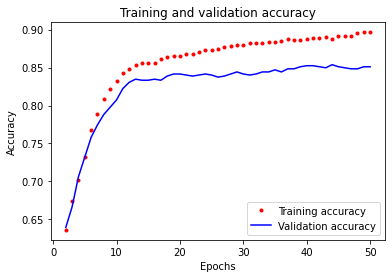

In [25]:
plt.plot(epochs[1:50], average_loss[1:50], "r.", label="Training loss")
plt.plot(epochs[1:50], average_val_loss[1:50], "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(epochs[1:50], average_accu_history[1:50], "r.", label="Training accuracy")
plt.plot(epochs[1:50], average_val_accu_history[1:50], "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [26]:
model = build_model()
model.fit(train_data, train_labels, 
          epochs=30, 
          batch_size=32)


Epoch 1/30
23/23 [==============================] - 0s 2ms/step - loss: 1.2568 - accuracy: 0.4401
Epoch 2/30
23/23 [==============================] - 0s 1ms/step - loss: 1.0294 - accuracy: 0.4482
Epoch 3/30
23/23 [==============================] - 0s 1ms/step - loss: 0.8727 - accuracy: 0.4687
Epoch 4/30
23/23 [==============================] - 0s 2ms/step - loss: 0.7642 - accuracy: 0.5054
Epoch 5/30
23/23 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5668
Epoch 6/30
23/23 [==============================] - 0s 1ms/step - loss: 0.6402 - accuracy: 0.6308
Epoch 7/30
23/23 [==============================] - 0s 2ms/step - loss: 0.6005 - accuracy: 0.7057
Epoch 8/30
23/23 [==============================] - 0s 1ms/step - loss: 0.5681 - accuracy: 0.7698
Epoch 9/30
23/23 [==============================] - 0s 1ms/step - loss: 0.5394 - accuracy: 0.8038
Epoch 10/30
23/23 [==============================] - 0s 1ms/step - loss: 0.5131 - accuracy: 0.8202
Epoch 11/30
23/23 [

In [27]:
predictions = model.predict(test_data)
# predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels


print(f"Le patient a {predictions[0][0]*100:.2f}% de chance de contracter la maladie")
print(f"Le modèle a une précision de {matches.mean()}% sur le test")

6/6 [==============================] - 0s 3ms/step
Le patient a 98.53% de chance de contracter la maladie
Le modèle a une précision de 0.532608695652174% sur le test


In [28]:
###methode du cours pour multiclass

In [57]:
import numpy as np
def vectorize_sequences(sequences, dimension=918):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [62]:
"""
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)
"""
donnees_sante_test_label = donnees_sante[734:,-1]
donnees_sante_train_label = donnees_sante[:550,-1]


In [31]:
"""
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[6000]])
decoded_newswire

"""


'? tunisia is expected to tender shortly for 100 000 tonnes of soft wheat for shipment between april and june covered by ? export credits trade sources said over 300 000 tonnes of french soft wheat have been sold to tunisia since the beginning of the 1986 87 campaign of which 225 000 to 250 000 tonnes have already been shipped they said reuter 3'

In [58]:

x_train = vectorize_sequences(donnees_sante_train)
x_test = vectorize_sequences(donnees_sante_test)

"""
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
"""

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [63]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(donnees_sante_train_label)
y_test = to_one_hot(donnees_sante_test_label)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [64]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [65]:
model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(2, activation="relu"),
    layers.Dense(1, activation="softmax")
])

In [66]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [67]:
x_val = x_train[:400]
partial_x_train = x_train[400:]
y_val = y_train[:400]
partial_y_train = y_train[400:]

In [68]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=40,
                    validation_data=(x_val, y_val))

ValueError: Data cardinality is ambiguous:
  x sizes: 150
  y sizes: 8582
Make sure all arrays contain the same number of samples.

In [69]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

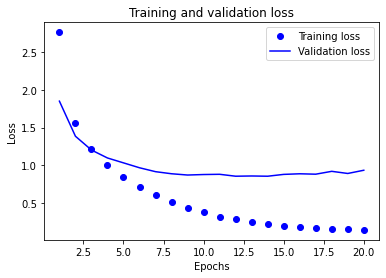

In [70]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

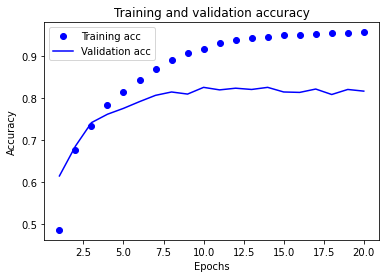

In [71]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [72]:
model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)

ValueError: Data cardinality is ambiguous:
  x sizes: 550
  y sizes: 8982
Make sure all arrays contain the same number of samples.

In [73]:
model = keras.Sequential([
  layers.Dense(8, activation="relu"),
  layers.Dense(4, activation="relu"),
  layers.Dense(1, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)

ValueError: Data cardinality is ambiguous:
  x sizes: 550
  y sizes: 8982
Make sure all arrays contain the same number of samples.

In [74]:
results = model.evaluate(x_test, y_test)

ValueError: Data cardinality is ambiguous:
  x sizes: 184
  y sizes: 2246
Make sure all arrays contain the same number of samples.

In [75]:
model.predict(x_test)

6/6 [==============================] - 0s 3ms/step


array([[0.00670963, 0.02607129, 0.00860529, ..., 0.01713941, 0.0710079 ,
        0.02402467],
       [0.01300165, 0.02037831, 0.01583614, ..., 0.01954882, 0.02451115,
        0.02731174],
       [0.00483273, 0.02782424, 0.00906203, ..., 0.01002806, 0.03627928,
        0.04469199],
       ...,
       [0.01061433, 0.02127155, 0.01183366, ..., 0.01453568, 0.03394994,
        0.02970409],
       [0.01137435, 0.01426423, 0.01376009, ..., 0.015703  , 0.03744915,
        0.03331704],
       [0.0182229 , 0.01999265, 0.01681582, ..., 0.02197912, 0.02520535,
        0.02118711]], dtype=float32)